In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

print(tf.__version__)

1.12.0


In [2]:
def read_fashion_mnist_dataset():
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    dataset_description = (train_images, train_labels), (test_images, test_labels), class_names
    return dataset_description

In [3]:
def visualise_fashion_mnist_dataset():
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])

In [13]:
def build_model(input_shape, network_layers, tf_activation_funcs, tf_dropouts, tf_optimizer, tf_loss, tf_metrics):
    assert(len(network_layers) == len(tf_activation_funcs) == len(tf_dropouts))
    
    model = keras.Sequential()
    
    model.add(keras.layers.Flatten(input_shape=input_shape))
    
    for i in range(len(network_layers)):
        model.add(keras.layers.Dense(network_layers[i], activation=tf_activation_funcs[i]))
        if tf_dropouts[i] != 0:
            model.add(keras.layers.Dropout(tf_dropouts[i]))

    model.compile(optimizer=tf_optimizer, loss=tf_loss, metrics=tf_metrics)
    
    return model

In [5]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=45)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [6]:
def plot_random_predictions(test_images, test_labels, predictions):
    index = random.randint(0, test_images.shape[0] - 1)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plot_image(index, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(index, predictions, test_labels)

In [16]:
def plot_train_val_curve(hist, title):
    train_loss = hist['loss'].values
    val_loss = hist['val_loss'].values
    plt.figure(figsize=(6,3))
    plt.title(title)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.plot(train_loss, label="train loss")
    plt.plot(val_loss, label="val loss")
    plt.legend()

In [27]:
dataset_description = read_fashion_mnist_dataset()
(train_images, train_labels), (test_images, test_labels), class_names = dataset_description

print("Train Shape: " + str(train_images.shape))
print("Train label Shape: " + str(train_labels.shape))
print("Test Shape: " + str(test_images.shape))
print("Test label Shape: " + str(test_labels.shape))

# visualise_fashion_mnist_dataset()

input_shape = (train_images.shape[1], train_images.shape[2])
network_layers = [64, 32, 16, 10]
tf_activation_funcs = ['relu', 'relu', 'relu', 'softmax']
tf_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
tf_loss = 'sparse_categorical_crossentropy'
tf_metrics = ['accuracy']
num_epochs = 50
val_split = 0.99

tf_dropouts = [0.5, 0.25, 0.1, 0]
dropout_model = build_model(input_shape, network_layers, tf_activation_funcs, tf_dropouts,
                            tf_optimizer, tf_loss, tf_metrics)

tf_dropouts = [0] * len(tf_activation_funcs)
normal_model = build_model(input_shape, network_layers, tf_activation_funcs, tf_dropouts,
                            tf_optimizer, tf_loss, tf_metrics)

dropout_history = dropout_model.fit(train_images, train_labels, epochs=num_epochs, validation_split=val_split)
dropout_test_loss, dropout_test_acc = dropout_model.evaluate(test_images, test_labels)
print('Test accuracy:', dropout_test_acc)
print('Test loss:', dropout_test_loss)
dropout_predictions = dropout_model.predict(test_images)

normal_history = normal_model.fit(train_images, train_labels, epochs=num_epochs, validation_split=val_split)
normal_test_loss, normal_test_acc = normal_model.evaluate(test_images, test_labels)
print('Test accuracy:', normal_test_acc)
print('Test loss:', normal_test_loss)
normal_predictions = normal_model.predict(test_images)

Train Shape: (60000, 28, 28)
Train label Shape: (60000,)
Test Shape: (10000, 28, 28)
Test label Shape: (10000,)
Train on 600 samples, validate on 59400 samples
Epoch 1/50
600/600 [==============================] - 2s 3ms/step - loss: 2.3578 - acc: 0.0950 - val_loss: 2.2988 - val_acc: 0.1290
Epoch 2/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3537 - acc: 0.1167 - val_loss: 2.2931 - val_acc: 0.1327
Epoch 3/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3661 - acc: 0.0983 - val_loss: 2.2877 - val_acc: 0.1375
Epoch 4/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3211 - acc: 0.1033 - val_loss: 2.2814 - val_acc: 0.1419
Epoch 5/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3315 - acc: 0.0833 - val_loss: 2.2758 - val_acc: 0.1512
Epoch 6/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3179 - acc: 0.1117 - val_loss: 2.2707 - val_acc: 0.1598
Epoch 7/50
600/600 [============================

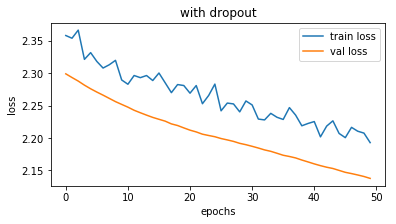

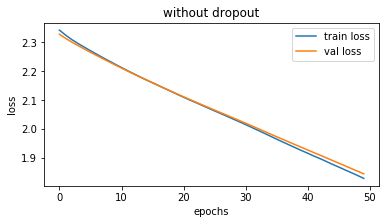

In [28]:
hist = pd.DataFrame(dropout_history.history)
hist['epoch'] = dropout_history.epoch
plot_train_val_curve(hist, 'with dropout')

hist = pd.DataFrame(normal_history.history)
hist['epoch'] = normal_history.epoch
plot_train_val_curve(hist, 'without dropout')

In [ ]:
plot_random_predictions(test_images, test_labels, predictions)